NAME: HITARTH BHATT SAPID: 60009220209 BATCH: D1-2


In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter # using hp filter
import matplotlib.pyplot as plt
import datetime as dt
from scipy import signal

#**HP FILTER**

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


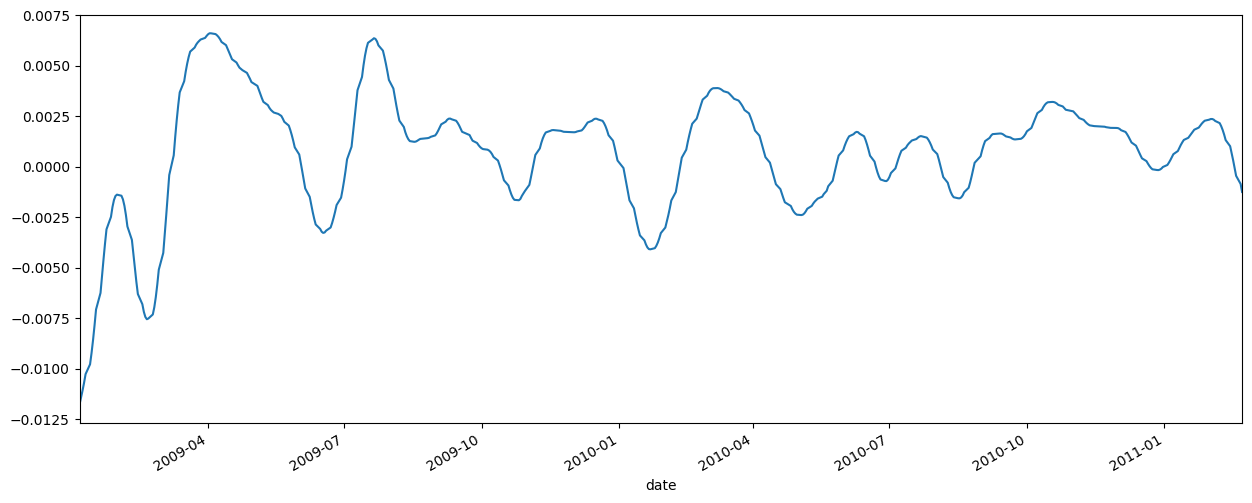

In [ ]:
# 1600 : Quarterly data (3 months)
# Detrending: Taking out Trend Components
# Difference Method, Panda Difference and Scipy (Using Signals) are the methods for Detrending (Can Also do using HP Filter but not Recommended)
df = pd.read_excel('/content/istambul_stock_exchange.xlsx',index_col=0,parse_dates=True)
DAX_cycle,DAX_trends = hpfilter(df['DAX'],lamb=1600)
DAX_trends.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

In the above Code we use hpfilter which is used for decomposing a time series into its trend and cyclical components
Early 2009: The trend starts with a noticeable decline, reflecting a period of negative performance in the DAX index.
Mid-2009: There is a significant upward trend, indicating a recovery and growth in the index.
Late 2009: The trend peaks and then shows a slight downward movement, suggesting a minor setback or correction.
Early 2010: The trend again rises, indicating another phase of growth in the DAX index.
Mid-2010 to Late 2010: The trend shows periodic fluctuations but generally trends downward, suggesting a period of volatility or slow decline.
Early 2011: The trend flattens, indicating stabilization in the index with minor fluctuations.


#**DETRENDING**

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


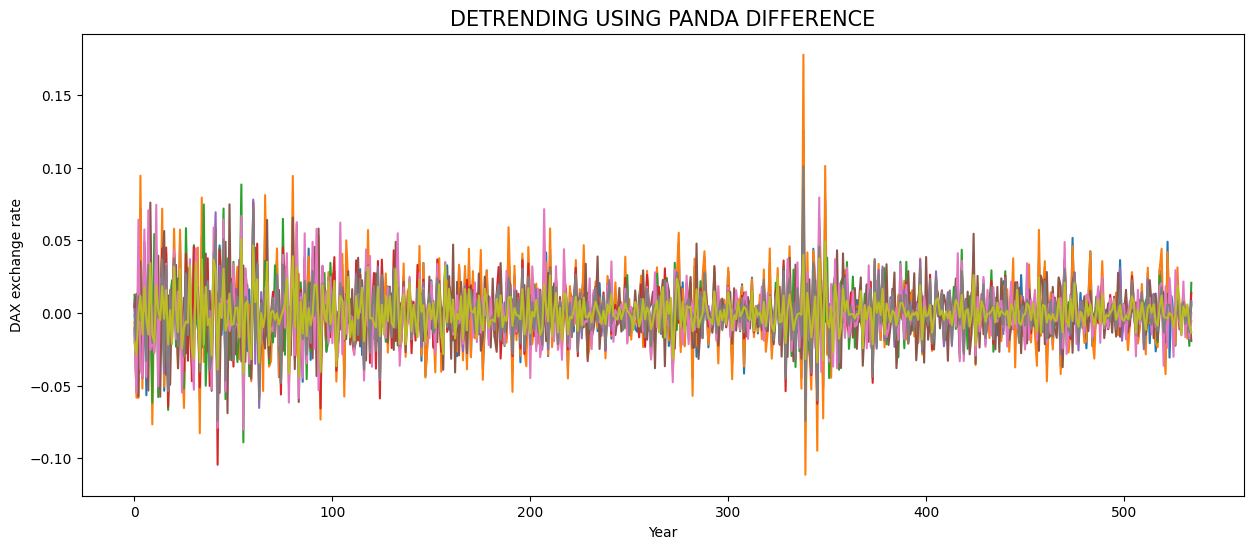

In [ ]:
series = pd.read_excel('/content/istambul_stock_exchange.xlsx',index_col=0,parse_dates=True)
X = series.values
diff = list()
for i in range(1,len(X)):
  value = X[i] - X[i-1]
  diff.append(value)
plt.figure(figsize = (15,6))
plt.plot(diff)
plt.title('DETRENDING USING PANDA DIFFERENCE',fontsize=15)
plt.xlabel('Year')
plt.ylabel('DAX exchange rate')
plt.show()

In this Section we Implement Detrending from scratch. Detrending is the process of removing the trend component from a time series to analyze the underlying cyclical or irregular components.

The graph demonstrates the detrending of the DAX stock index using the difference method, effectively removing the long-term trend and highlighting short-term fluctuations. The x-axis represents time in terms of data point indices, while the y-axis shows the differences in the DAX exchange rate between successive periods, ranging from approximately -0.10 to 0.15. This detrending method reveals the underlying variability and volatility of the DAX index, centering the differences around zero. The plot exhibits significant fluctuations, with a notable spike around the 300th data point, indicating a substantial change in the DAX index during that period. By focusing on these differences, the graph provides a clearer view of the short-term movements, making it easier to analyze periods of stability and volatility without the influence of long-term trends.

# **DETRENDING USING PANDA DIFFERENCE FUNCTION**

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


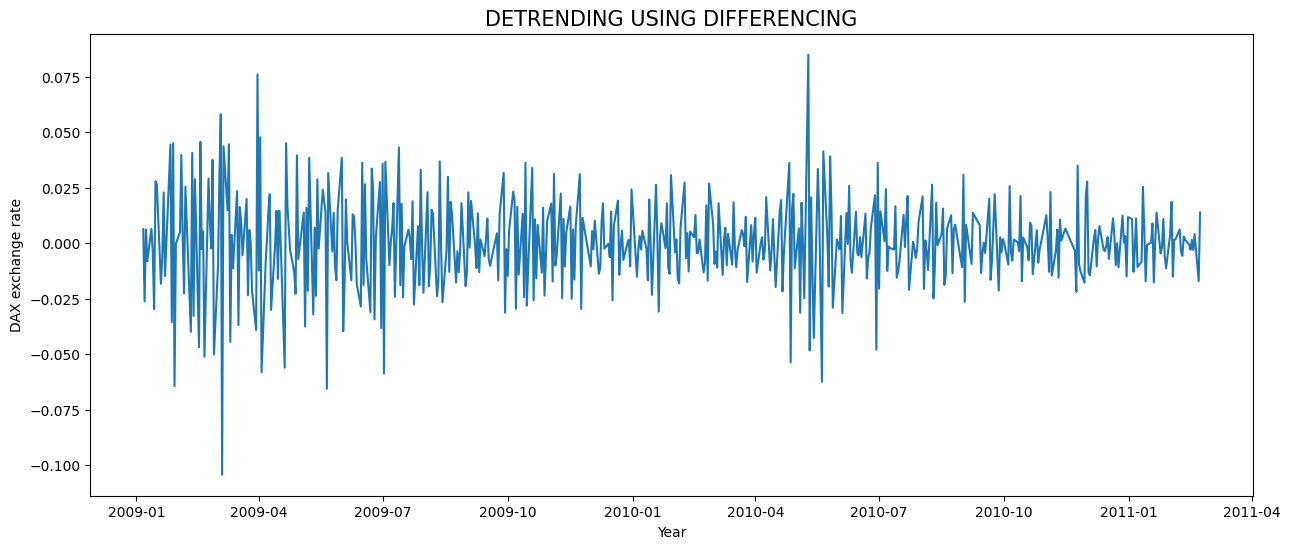

In [ ]:
df = pd.read_excel('/content/istambul_stock_exchange.xlsx',index_col=0,parse_dates=True)
diff = df.DAX.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('DETRENDING USING DIFFERENCING',fontsize=15)
plt.xlabel('Year')
plt.ylabel('DAX exchange rate')
plt.show()

Here we Implement Detrending using an in-build function in pandas diff() which works in the same fasion as the code we wrote from scratch

detrending of the DAX stock index using the difference method. By calculating the difference between consecutive data points, the long-term trend is removed, leaving behind short-term fluctuations. The x-axis represents the time periods covered by the dataset, while the y-axis shows the differences in the DAX exchange rate between successive periods, ranging from approximately -0.10 to 0.15. The plot reveals the underlying variability in the DAX index, with fluctuations oscillating around the zero line, indicating the removal of the overall trend. A significant spike around the 300th data point highlights a period of substantial change in the index. The detrended data now shows the short-term movements and volatility of the DAX index, offering a clearer perspective for analysis.


# **DETRENDING USING HP FILTER**

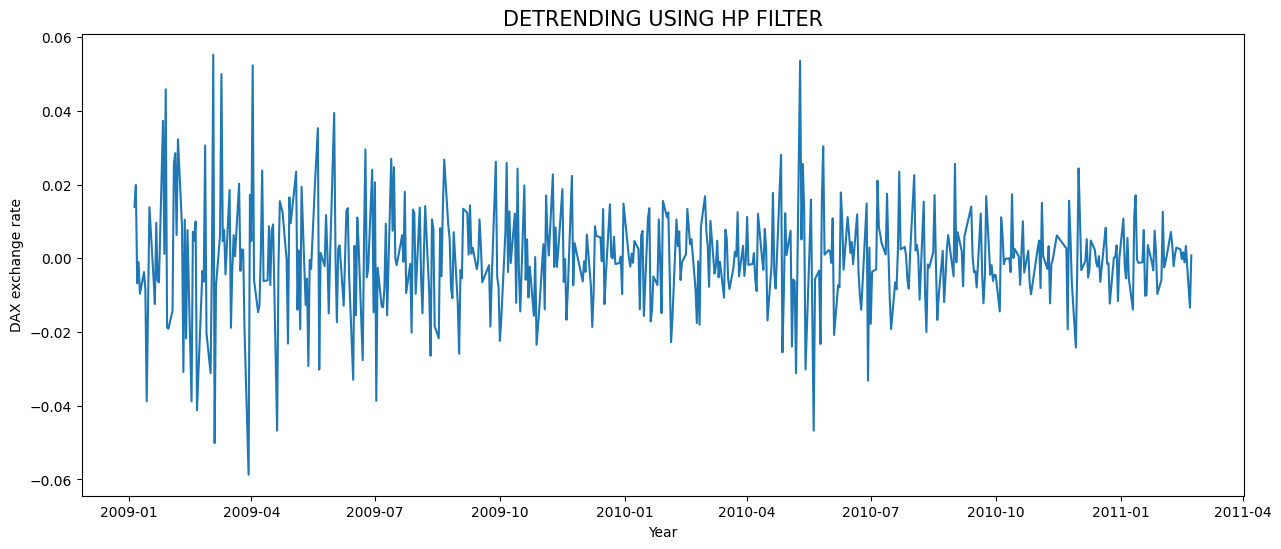

In [ ]:
cycle,trend = hpfilter(df['DAX'],lamb=1600)
diff = df['DAX'] - trend
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('DETRENDING USING HP FILTER',fontsize=15)
plt.xlabel('Year')
plt.ylabel('DAX exchange rate')
plt.show()

Detrending using the Hodrick-Prescott (HP) filter involves decomposing a time series into its trend and cyclical components. The HP filter separates the long-term trend from the short-term fluctuations by minimizing the difference between the actual data and the trend while penalizing the variability in the trend component. This is achieved by applying a smoothing parameter, lambda.
The graph shows the DAX exchange rate fluctuations from early 2009 to early 2011. The vertical axis represents the exchange rate deviations, while the horizontal axis shows the time. The HP (Hodrick-Prescott) filter is used to remove the trend, highlighting the cyclical variations.

In 2009, the data exhibit high volatility with frequent and significant deviations. Moving towards 2011, the volatility slightly decreases, showing smaller deviations. This graph effectively demonstrates the cyclical patterns in the DAX exchange rates during the given period.








# **DETRENDING USING SCIPY SIGNAL**

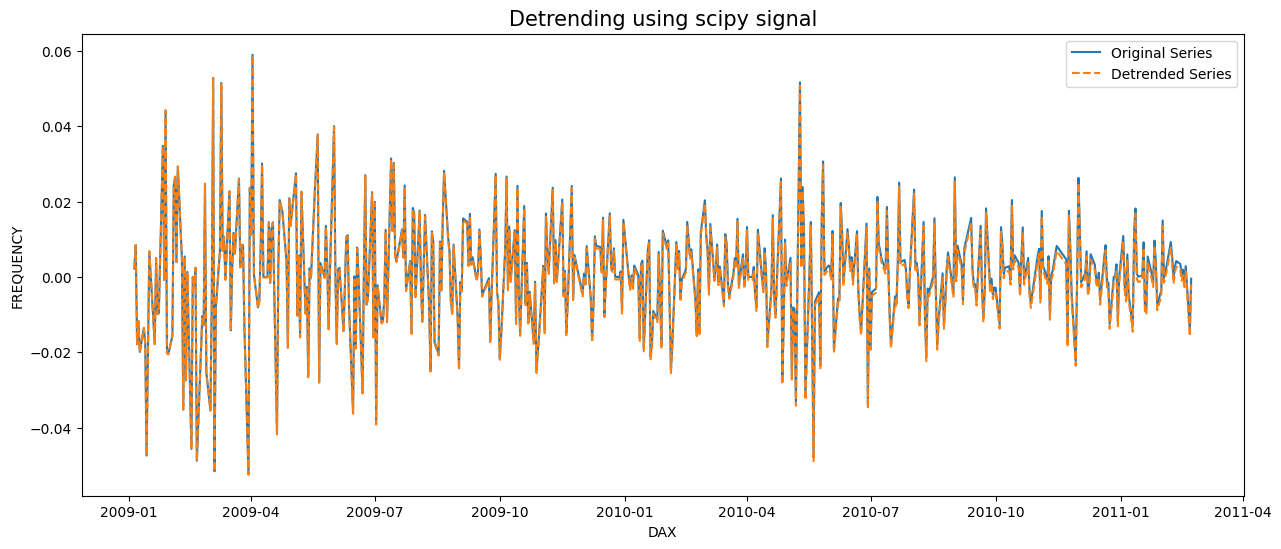

In [ ]:
detrended_series = signal.detrend(df.DAX.values)

# Plot the original series and the detrended series
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['DAX'], label='Original Series')
plt.plot(df.index, detrended_series, label='Detrended Series', linestyle='--')
plt.title('Detrending using scipy signal', fontsize=15)
plt.xlabel('DAX')
plt.ylabel('FREQUENCY')
plt.legend()
plt.show()


In the scipy signal we use the the detrend function. This function is designed to eliminate linear or constant trends from data sets. The detrend function takes an array of data as input and allows you to specify the type of trend removal. By default, it removes linear trends, but you can also choose to remove constant offsets. For instance, if you have a dataset with a linear trend and some random noise, applying detrend will strip out the linear component, leaving you with the residual data that highlights the variations around the trend. This is particularly useful for focusing on the fluctuations within the data rather than the overall trend.

The graph illustrates the DAX exchange rates from early 2009 to early 2011. The vertical axis represents frequency, while the horizontal axis shows the DAX exchange rate over time. The graph includes both the original series (in blue) and the detrended series (in orange dashed lines), highlighting the deviations from the trend.

The original series shows high volatility with significant fluctuations around the mean. The detrended series closely follows the original, removing the trend to expose cyclical variations. The volatility is higher in 2009 and gradually decreases towards 2011, demonstrating the effectiveness of the scipy signal method in isolating cyclical patterns from the data.